**NumPy (Array Operations)**


1. Create a NumPy array of shape (5, 5) with random integers between 1 and 50.
o Find the row with the maximum sum.
o Replace all elements greater than the mean with 0.

In [29]:
import numpy as np

# Created 5x5 array with random integers between 1 and 50
arr = np.random.randint(1, 51, size=(5, 5))
print("Original Array:\n", arr)

# Find the row with the maximum sum
row_sums = arr.sum(axis=1)
max_sum_row_index = np.argmax(row_sums)

print("\nRow sums:", row_sums)
print("Row with maximum sum (index):", max_sum_row_index)
print("Row with maximum sum:", arr[max_sum_row_index])

# Calculate mean of the array
mean_val = arr.mean()
print("\nMean of array:", mean_val)

# Replace elements greater than mean with 0
arr[arr > mean_val] = 0

print("\nModified Array (values > mean, replaced with 0):\n", arr)


Original Array:
 [[36  1  8 48 48]
 [42 13 49 11 14]
 [ 7 23 46 14 30]
 [37 43  8 31 22]
 [34 23 27 40 39]]

Row sums: [141 129 120 141 163]
Row with maximum sum (index): 4
Row with maximum sum: [34 23 27 40 39]

Mean of array: 27.76

Modified Array (values > mean, replaced with 0):
 [[ 0  1  8  0  0]
 [ 0 13  0 11 14]
 [ 7 23  0 14  0]
 [ 0  0  8  0 22]
 [ 0 23 27  0  0]]


**Pandas (Data Handling)**

3. Load the dataset Iris data

In [30]:
import seaborn as sns
iris = sns.load_dataset('iris')

o Display the first 10 rows



In [31]:
print(iris.head(10))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa


Display basic statistics

In [32]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


o Filter all rows where sepal_length > median and species is "versicolor".

In [34]:
median_sepal_length = iris["sepal_length"].median()

filtered_df = iris[
    (iris["sepal_length"] > median_sepal_length) &
    (iris["species"] == "versicolor")
]
print(filtered_df)

    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor
54           6.5          2.8           4.6          1.5  versicolor
56           6.3          3.3           4.7          1.6  versicolor
58           6.6          2.9           4.6          1.3  versicolor
61           5.9          3.0           4.2          1.5  versicolor
62           6.0          2.2           4.0          1.0  versicolor
63           6.1          2.9           4.7          1.4  versicolor
65           6.7          3.1           4.4          1.4  versicolor
68           6.2          2.2           4.5          1.5  versicolor
70           5.9          3.2           4.8          1.8  versicolor
71           6.1          2.8           4.0          1.3  versicolor
72           6.3          2.5     

o Group the data by species and compute the mean petal_length.

In [35]:
mean_petal_length = iris.groupby("species")["petal_length"].mean()
print(mean_petal_length)

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64


4. Add a new column named petal_ratio = petal_length / petal_width.



In [36]:
iris["petal_ratio"] = iris["petal_length"] / iris["petal_width"]
print(iris.head(5))

   sepal_length  sepal_width  petal_length  petal_width species  petal_ratio
0           5.1          3.5           1.4          0.2  setosa          7.0
1           4.9          3.0           1.4          0.2  setosa          7.0
2           4.7          3.2           1.3          0.2  setosa          6.5
3           4.6          3.1           1.5          0.2  setosa          7.5
4           5.0          3.6           1.4          0.2  setosa          7.0


o Find the top 5 rows with the highest petal_ratio.

In [37]:
top_5_row = iris.sort_values(by="petal_ratio",ascending=False)
print(top_5_row.head(5))

    sepal_length  sepal_width  petal_length  petal_width species  petal_ratio
9            4.9          3.1           1.5          0.1  setosa         15.0
32           5.2          4.1           1.5          0.1  setosa         15.0
37           4.9          3.6           1.4          0.1  setosa         14.0
12           4.8          3.0           1.4          0.1  setosa         14.0
13           4.3          3.0           1.1          0.1  setosa         11.0


**Data Visualization**

5. Using Matplotlib, create a histogram of sepal_length with 15 bins.



Text(0.5, 0, 'sepal_length')

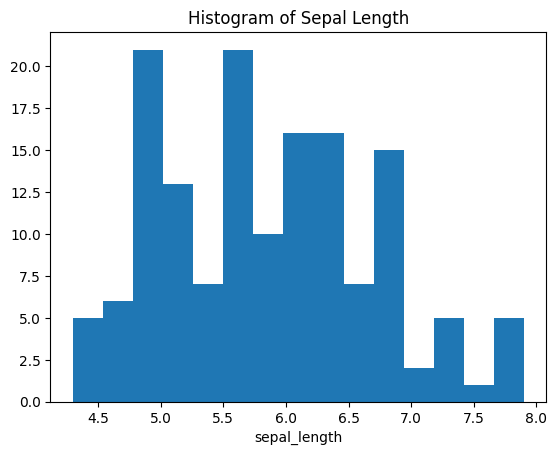

In [38]:
import matplotlib.pyplot as plt
plt.hist(iris['sepal_length'],bins=15)
plt.title('Histogram of Sepal Length')
plt.xlabel('sepal_length')

Using Matplotlib, create a scatter plot of sepal_length vs petal_length, color-coded by species.

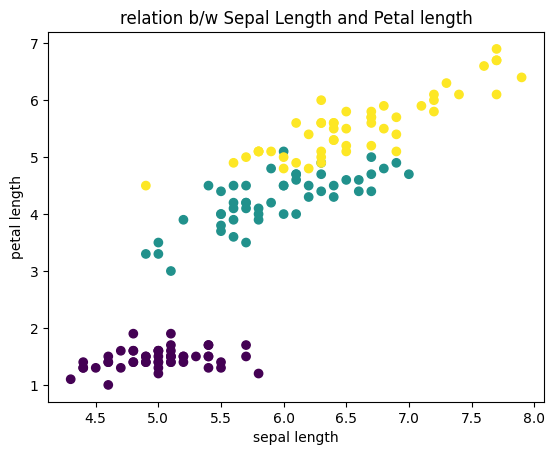

In [39]:
# Convert species to numeric codes
iris['species_code'] = iris['species'].astype('category').cat.codes

plt.scatter(iris['sepal_length'],iris['petal_length'],c=iris['species_code'])
plt.title("relation b/w Sepal Length and Petal length")
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.show()

6. Using Seaborn, plot a pairplot of the entire dataset.

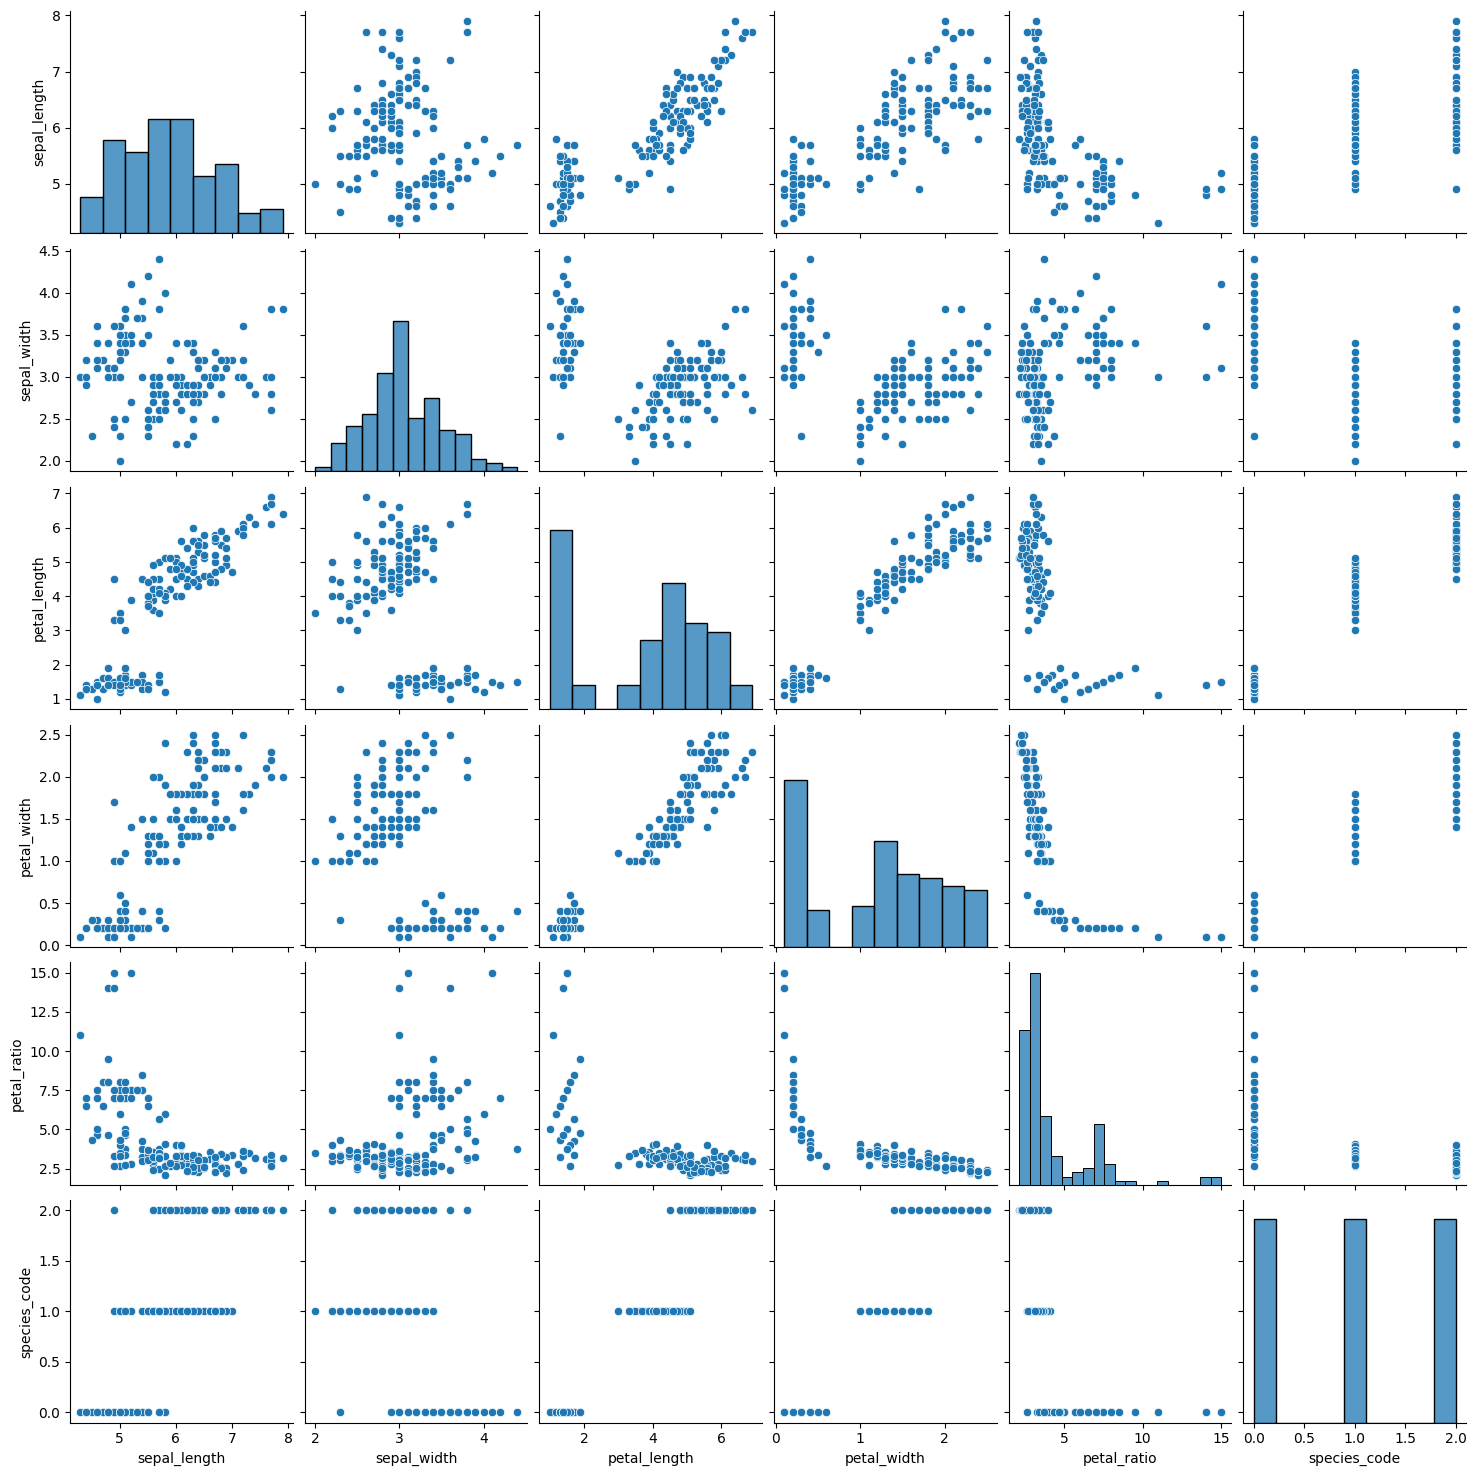

In [40]:
sns.pairplot(iris)

Using Seaborn, plot a boxplot showing petal_width distribution for each species.


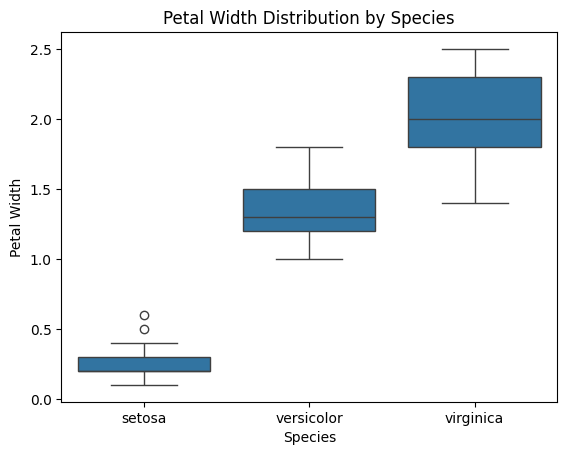

In [41]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title('Petal Width Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.show()